# Trabalho final ML

<a href="https://www.kaggle.com/code/reihanenamdari/depression-logistic-regression-and-gridsearchcv/data">Dataset</a>
<br>
<hr>

<br>

#### Contexto e objetivo do trabalho
O trabalho prático da disciplina CMP263 - Aprendizagem de Máquina visa
permitir que os alunos desenvolvam um modelo preditivo para um problema de
interesse, praticando aspectos discutidos na disciplina relacionados ao treinamento e
avaliação de modelos de classificação ou regressão, e interpretação dos modelos
gerados.
A proposta do projeto final é que os alunos aprofundem e consolidem sua
experiência no desenvolvimento de modelos preditivos, abordando aspectos ao
longo de toda a metodologia de treinamento de modelos, conforme discutimos em
aula. 

## Metodologia

CRISP-DM

1. Entendimento do negócio
2. Entendimento dos dados
3. Preparação dos dados
4. Modelagem
5. Validação
6. Deployment

## 1. Entendimento do negócio

### About Dataset
##### Context


O dataset original foi publicado pro Frankcc no seguinte link: <a href="https://www.kaggle.com/datasets/diegobabativa/depression?resource=download">Link Kaggle</a>

O dataset está envolvido na análise da depressão. Os dados consistem de um estudo das condições de vida de pessoas que vivem em zonas rurais. 

- Conteúdo
1. Surveyid 
2. Villeid
3. sex
4. Age
5. Married
6. Numberchildren 
7. educationlevel
8. totalmembers (in the family) 
9. gainedasset
10. durableasset 
11. saveasset
12. livingexpenses 
13. otherexpenses
14. incomingsalary 
15. incomingownfarm 
16. incomingbusiness
17. incomingnobusiness
18. incomingagricultural 
19. farmexpenses
20. laborprimary 
21. lastinginvestment
22. nolastinginvestmen
23. depressed: [ Zero: No depressed] or [One: depressed] (Binary for target class)

the main objective is to show statistic analysis and some data mining techniques.

The dataset has 23 columns or dimensions and a total of 1432 rows or objects.

Acknowledgements
The original attribution is to Frankcc i

Inspiration

<a href="https://zindi.africa/competitions/busara-mental-health-prediction-challenge/data">Busara</a>

## Problema

Classificação -  objetivo é treinar o melhor classificador possível para detectar o risco de depressão



Tirando esta parte, você precisa avaliar as necessidades de pré-processamento dos dados, como imputar valor faltantes, tratar outliers, normalizar, balancear as classes, etc... Você pode aplicar seleção de atributos se deseja avaliar se um subconjunto dos atributos originais já lhe dar bom poder preditivo.

Esse pipeline será integrado a algoritmos de classificação (veja bem, suas saídas são numéricas, mas não se trata de uma regressão. Você tem valores na classe 0 ou 1, pois as classes foram codificadas dessa forma) - e o objetivo será treinar o melhor classificador possível para detectar o risco de depressão.

 

In [365]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## i) análise exploratória dos dados
para identificar possíveis problemas nos
dados que possam impactar negativamente no treinamento de modelos;

In [386]:
for dirname, _, filenames in os.walk('/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset/test.csv
/home/kaline/workspace/mestrado/TrabalhoFinalML/Dataset/train.csv


In [367]:
target_column_name = 'depressed'

In [368]:
def DataLoading():
    df = pd.read_csv('train.csv')
    print('Dataset - Linhasxcolunas ', df.shape)
    

    return df

df = DataLoading()
df

Dataset - Linhasxcolunas  (1143, 75)


,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,927,152,27-Dec-61,1,36.0,0,4,5,9,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,4
1139,1039,104,13-Sep-61,1,23.0,1,0,2,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,4
1140,428,54,23-Nov-61,1,28.0,1,5,7,10,5,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5
1141,23,3,05-Oct-61,1,33.0,0,4,5,9,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f996bcf6110>,
      dtype=object)

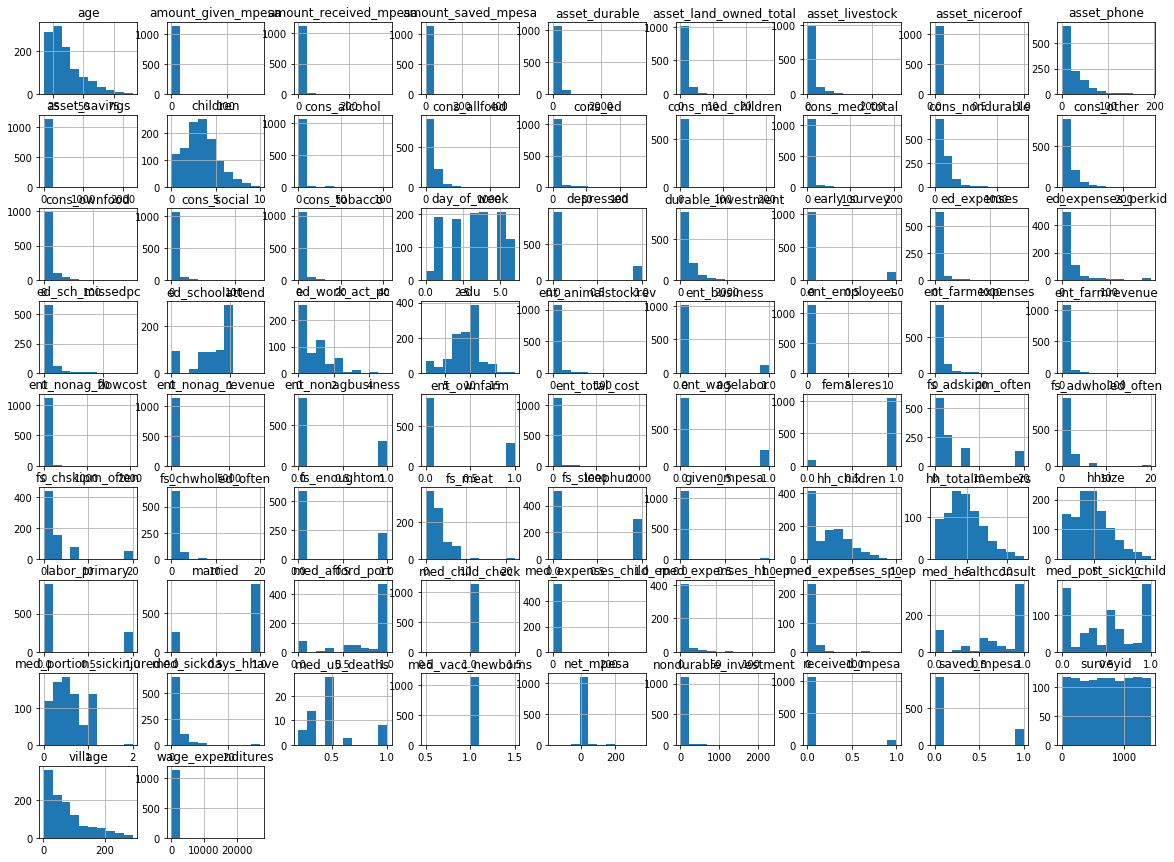

In [369]:
df.hist(figsize=(20, 15))

0    950
1    193
Name: depressed, dtype: int64
depressed
0    83.114611
1    16.885389
dtype: float64


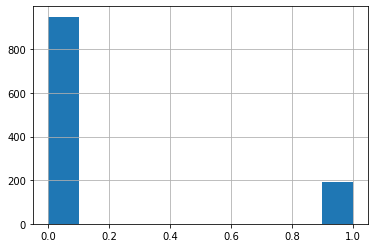

In [370]:
print(df['depressed'].value_counts())
print(df.groupby('depressed').size()/df.shape[0]
*100)

df['depressed'].hist()

### Distribuição da coluna target (depressed)

Classes não balanceadas


A variável target do treino possui 20.32% de positivos.


Text(0.5, 1.0, 'Quantidade de registros por classe')

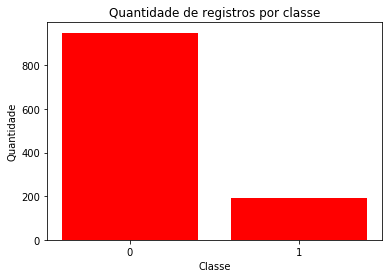

In [371]:
#Contagem de registros por classes
from turtle import color


target_counts = df['depressed'].value_counts()
positives = target_counts[1]
negatives = target_counts[0]

#Proporção em %
prop = (positives/negatives)*100
print('\nA variável target do treino possui {}% de positivos.'. format(round(prop,2)))

#Gráfico
plt.bar(target_counts.index, target_counts,color='red')
plt.xticks([0, 1])
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.title('Quantidade de registros por classe')


#### Tipos de dados nas colunas

Text(0.5, 1.0, 'Quantidade de colunas por tipos de dados')

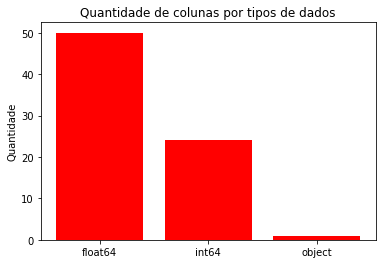

In [372]:
tipos_dados = df.dtypes.value_counts()

#Recurso visual
plt.bar(tipos_dados.index.astype(str), tipos_dados.values, color='red')
plt.ylabel('Quantidade')
plt.title('Quantidade de colunas por tipos de dados')

In [373]:
df.info

<bound method DataFrame.info of       surveyid  village survey_date  femaleres   age  married  children  \
0          926       91   23-Nov-61          1  28.0        1         4   
1          747       57   24-Oct-61          1  23.0        1         3   
2         1190      115   05-Oct-61          1  22.0        1         3   
3         1065       97   23-Sep-61          1  27.0        1         2   
4          806       42   12-Sep-61          0  59.0        0         4   
...        ...      ...         ...        ...   ...      ...       ...   
1138       927      152   27-Dec-61          1  36.0        0         4   
1139      1039      104   13-Sep-61          1  23.0        1         0   
1140       428       54   23-Nov-61          1  28.0        1         5   
1141        23        3   05-Oct-61          1  33.0        0         4   
1142       116       18   24-Sep-61          1  39.0        1         0   

      hhsize  edu  hh_children  ...  given_mpesa  amount_given_mpes

In [374]:
df.shape

(1143, 75)

In [375]:
df.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [376]:
df.columns

Index(['surveyid', 'village', 'survey_date', 'femaleres', 'age', 'married',
       'children', 'hhsize', 'edu', 'hh_children', 'hh_totalmembers',
       'cons_nondurable', 'asset_livestock', 'asset_durable', 'asset_phone',
       'asset_savings', 'asset_land_owned_total', 'asset_niceroof',
       'cons_allfood', 'cons_ownfood', 'cons_alcohol', 'cons_tobacco',
       'cons_med_total', 'cons_med_children', 'cons_ed', 'cons_social',
       'cons_other', 'ent_wagelabor', 'ent_ownfarm', 'ent_business',
       'ent_nonagbusiness', 'ent_employees', 'ent_nonag_revenue',
       'ent_nonag_flowcost', 'ent_farmrevenue', 'ent_farmexpenses',
       'ent_animalstockrev', 'ent_total_cost', 'fs_adskipm_often',
       'fs_adwholed_often', 'fs_chskipm_often', 'fs_chwholed_often', 'fs_meat',
       'fs_enoughtom', 'fs_sleephun', 'med_expenses_hh_ep',
       'med_expenses_sp_ep', 'med_expenses_child_ep',
       'med_portion_sickinjured', 'med_port_sick_child', 'med_afford_port',
       'med_sickdays_hhave

In [379]:
min(df['age'])

17.0

In [378]:
max(df['age'])

91.0

In [ ]:
df.mean()

Survey_id                7.150000e+02
Ville_id                 7.628621e+01
sex                      9.181246e-01
Age                      3.477747e+01
Married                  7.725682e-01
Number_children          2.883135e+00
education_level          8.687194e+00
total_members            4.969209e+00
gained_asset             3.363448e+07
durable_asset            2.717296e+07
save_asset               2.742471e+07
living_expenses          3.248257e+07
other_expenses           3.366632e+07
incoming_salary          1.798460e-01
incoming_own_farm        2.519244e-01
incoming_business        1.077677e-01
incoming_no_business     2.603219e-01
incoming_agricultural    3.451039e+07
farm_expenses            3.549153e+07
labor_primary            2.134360e-01
lasting_investment       3.299222e+07
no_lasting_investmen     3.360385e+07
depressed                1.665500e-01
dtype: float64

In [ ]:
print('Podemos observar que temos variáveis em diferentes escalas\nO desvio padrão (std) alto')
df.describe()

Podemos observar que temos variáveis em diferentes escalas
O desvio padrão (std) alto


,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,...,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,...,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,...,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,351.500000,23.000000,1.000000,24.000000,1.000000,2.000000,3.000000,8.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,717.000000,57.000000,1.000000,30.000000,1.000000,3.000000,5.000000,9.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1078.500000,105.500000,1.000000,41.000000,1.000000,4.000000,6.000000,10.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,1429.000000,292.000000,1.000000,91.000000,1.000000,10.000000,12.000000,19.000000,10.000000,12.000000,...,1.000000,160.153700,1.000000,352.338130,352.338130,1.000000,488.468780,1.000000,1.000000,6.000000


In [ ]:
df.corr()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
surveyid,1.000000,0.662797,0.025247,0.041632,-0.015671,0.031325,0.027476,-0.039734,-0.000358,0.024113,...,0.045888,0.040764,-0.021107,0.000453,-0.009799,0.072213,0.020514,-0.073316,-0.019913,0.007106
village,0.662797,1.000000,-0.008408,0.001868,0.022867,0.039394,0.034232,-0.009572,-0.041124,0.027366,...,0.027330,0.006922,-0.039510,0.008756,0.006716,0.063153,0.001042,-0.069818,0.015881,-0.028304
femaleres,0.025247,-0.008408,1.000000,-0.137133,0.275119,0.224375,0.256443,-0.075308,0.197696,0.257334,...,0.012628,0.018648,-0.034134,-0.034100,-0.037609,0.007713,-0.008594,0.003292,-0.008112,0.003938
age,0.041632,0.001868,-0.137133,1.000000,-0.400452,-0.111424,-0.068531,-0.393277,-0.070510,-0.047794,...,-0.026741,-0.025685,0.046239,0.016848,0.022718,-0.095900,-0.018136,-0.063066,0.100159,0.028122
married,-0.015671,0.022867,0.275119,-0.400452,1.000000,0.220000,0.322867,0.197570,0.152999,0.295652,...,0.051875,0.041664,-0.022720,0.007061,-0.003645,0.070017,0.034929,0.003347,-0.078541,-0.057146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saved_mpesa,0.072213,0.063153,0.007713,-0.095900,0.070017,0.035391,0.035991,0.080371,0.017773,0.015912,...,0.028692,0.016197,0.077481,0.064039,0.057767,1.000000,0.222436,-0.053862,-0.014749,-0.026371
amount_saved_mpesa,0.020514,0.001042,-0.008594,-0.018136,0.034929,-0.004842,-0.016109,0.039023,0.014934,0.012571,...,0.053702,0.010897,0.042999,0.029160,0.025419,0.222436,1.000000,-0.015620,-0.024712,0.051611
early_survey,-0.073316,-0.069818,0.003292,-0.063066,0.003347,-0.024424,-0.029693,0.042708,0.115244,-0.043465,...,-0.041691,-0.020857,-0.040716,0.019411,0.023981,-0.053862,-0.015620,1.000000,0.000694,0.034737
depressed,-0.019913,0.015881,-0.008112,0.100159,-0.078541,0.012671,0.005681,-0.122236,0.007477,0.069460,...,-0.019497,0.000751,-0.007807,0.005464,0.005087,-0.014749,-0.024712,0.000694,1.000000,-0.019514


### Count NAN in each column

In [ ]:
df.isnull().sum().sort_values().tail(25)

asset_land_owned_total        0
asset_savings                 0
cons_tobacco                 20
cons_alcohol                 43
fs_sleephun                 334
hh_totalmembers             334
fs_enoughtom                334
med_sickdays_hhave          334
med_portion_sickinjured     334
fs_meat                     334
med_port_sick_child         416
fs_chskipm_often            416
fs_chwholed_often           416
cons_med_children           419
med_afford_port             423
med_healthconsult           423
ed_schoolattend             463
ed_expenses                 463
ed_expenses_perkid          463
ed_sch_missedpc             467
ed_work_act_pc              571
med_expenses_child_ep       600
med_expenses_hh_ep          693
med_expenses_sp_ep          878
med_u5_deaths              1084
dtype: int64

## Detecção de outliers

Melhorar a perfomance do R² (score)

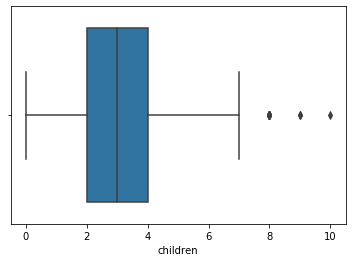

In [381]:
sns.boxplot(df.children)

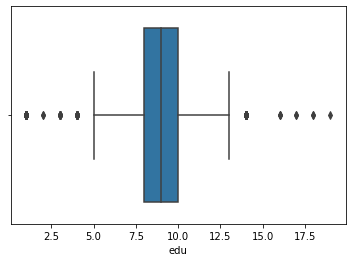

In [383]:
sns.boxplot(df.edu)

In [384]:
sns.boxplot(df.)

AttributeError: 'DataFrame' object has no attribute 'total_members'

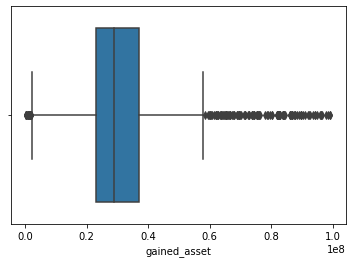

In [ ]:
sns.boxplot(df.gained_asset)

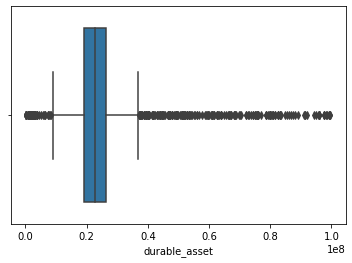

In [ ]:
sns.boxplot(df.durable_asset)

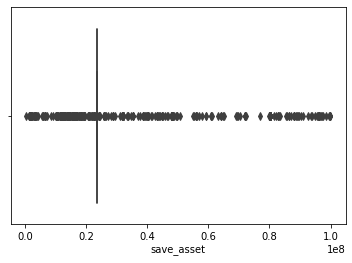

In [ ]:
sns.boxplot(df.save_asset)

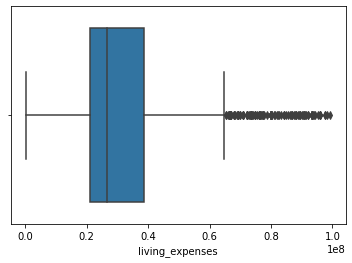

In [ ]:
sns.boxplot(df.living_expenses)

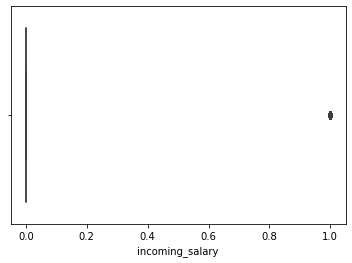

In [ ]:
sns.boxplot(df.incoming_salary)

In [ ]:
df.head(5)

,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,living_expenses,...,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed,Z-score
0,1,28,1,4,10,5,28912201,22861940,23399979,26692283,...,0,0,0,30028818,31363432,0,28411718,28292707.0,0,0.585016
1,1,23,1,3,8,5,28912201,22861940,23399979,26692283,...,0,0,0,30028818,31363432,0,28411718,28292707.0,1,0.050805
2,1,22,1,3,9,5,28912201,22861940,23399979,26692283,...,0,0,0,30028818,31363432,0,28411718,28292707.0,0,0.050805
3,1,27,1,2,10,4,52667108,19698904,49647648,397715,...,1,0,1,22288055,18751329,0,7781123,69219765.0,0,-0.483406
4,0,59,0,4,10,6,82606287,17352654,23399979,80877619,...,0,0,0,53384566,20731006,1,20100562,43419447.0,0,0.585016


In [ ]:
df.count()

surveyid              1143
village               1143
survey_date           1143
femaleres             1143
age                   1143
                      ... 
saved_mpesa           1143
amount_saved_mpesa    1143
early_survey          1143
depressed             1143
day_of_week           1143
Length: 75, dtype: int64

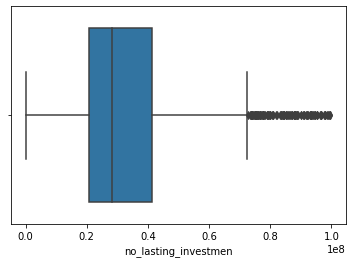

In [ ]:
sns.boxplot(x=df['no_lasting_investmen'])

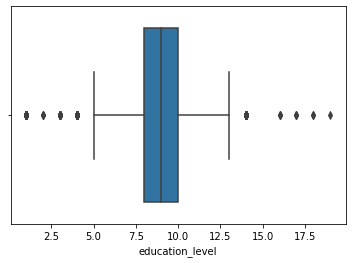

In [ ]:
sns.boxplot(x=df['education_level'])

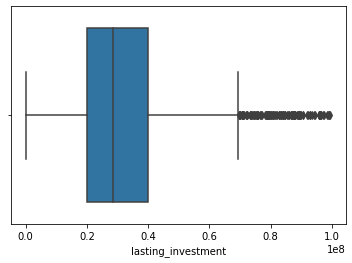

In [ ]:
sns.boxplot(x=df['lasting_investment'])

In [ ]:

# correlation 
print(df.corr())

                       Survey_id  Ville_id       sex       Age   Married  \
Survey_id               1.000000  0.662523  0.025015  0.021877 -0.011441   
Ville_id                0.662523  1.000000  0.010970 -0.012279  0.026970   
sex                     0.025015  0.010970  1.000000 -0.159376  0.282472   
Age                     0.021877 -0.012279 -0.159376  1.000000 -0.396944   
Married                -0.011441  0.026970  0.282472 -0.396944  1.000000   
Number_children         0.020242  0.030428  0.214297 -0.138448  0.227206   
education_level        -0.037984 -0.010412 -0.072137 -0.377146  0.218406   
total_members           0.003653  0.007225  0.180664 -0.073936  0.246808   
gained_asset            0.018949 -0.014400  0.022316  0.008316 -0.015317   
durable_asset          -0.020738 -0.026135  0.028602  0.045368 -0.045356   
save_asset             -0.014632 -0.020477  0.006637 -0.026685  0.009164   
living_expenses         0.012638 -0.027240 -0.003493 -0.036599  0.024518   
other_expens

## ii) pré-processamento dos dados
abordando aspectos como correção de
outliers e de valores faltantes, codificação de atributos categóricos, discretização de
atributos numéricos, normalização, ajuste de desbalanceamento de classes e
redução de dimensionalidade

### Removendo NAN

In [ ]:
df.drop(df[(df['no_lasting_investmen'].isnull())].index, axis = 0, inplace = True)
df.isnull().sum()


Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

#### Valores ausentes

In [ ]:
# Contagem de valores ausentes por coluna
print("Quantidade de valores ausentes por coluna: \n",np.array((len(df)-df.count())/76020))

Quantidade de valores ausentes por coluna: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Função que deleta registros duplicados da base (Mantendo apenas o primeiro registro a cada grupo de duplicatas)
def DupRegClean(df):
    # Registros duplicados podem causar ruído nos algoritmos de machine learning portanto iremos excluí-los.
    # (Se por acaso colunas duplicadas estierem presentes nos datasets de treino e teste, os resultados podem se mostrar tendenciosos).
    print('df antes: ',df.shape)
    df_saida = df.drop_duplicates(inplace=False,keep='first')
    print('Após a limpeza de registros duplicados: ',df_saida.shape)
    return df_saida

# Aplica limpeza
df = DupRegClean(df)

df antes:  (1409, 23)
Após a limpeza de registros duplicados:  (1409, 23)


#### Colunas constantes

In [ ]:
# Função que deleta colunas constantes do dataset
def ConstFeatClean(df_train):
    # Colunas constantes não são úteis para discriminar a satisfação de clientes. Vamos exclui-las.
    print('df antes: ',df_train.shape)
    df_train = df_train.loc[:,df_train.apply(pd.Series.nunique) != 1]
    print('Após limpeza de colunas constantes: ',df_train.shape)
    return df_train

# Aplica função de deleção de contantes
df = ConstFeatClean(df)

df antes:  (1409, 23)
Após limpeza de colunas constantes:  (1409, 23)


#### Removendo colunas irrelevantes

Minha sugestão no primeiro momento é remover apenas as colunas que pela sua definição não parecem ter relevância/poder preditivo, o que eu acredito ser o caso das duas variáveis com "_id" no final (não olhei em profundidade os dados). Se as variáveis forem categóricas e tiverem muitos valores possíveis, também pode ser difícil usar no modelo. Neste caso, você pode optar por manter apenas um subconjunto de valores para as categorias mais frequentes, e todas as outras agrupar em uma única categoria ("Outros", por exemplo).

In [ ]:
# Colunas categoricas
print(df.select_dtypes(include=['object']).columns.tolist())

# Não tenho tempo para trabalhar com colunas de data agora
df.drop('Survey_id',inplace=True,axis=1)
df.drop('Ville_id',inplace=True,axis=1)


[]


In [ ]:
df.columns

Index(['sex', 'Age', 'Married', 'Number_children', 'education_level',
       'total_members', 'gained_asset', 'durable_asset', 'save_asset',
       'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

#### z-score - remover outliers

Z score = (x -mean) / std. deviation

- df antes:  (1409, 23)


In [ ]:
mean = np.mean(df.Age)
std = np.std(df.Age)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 34.733853797019165
std. deviation is 13.795813931242565


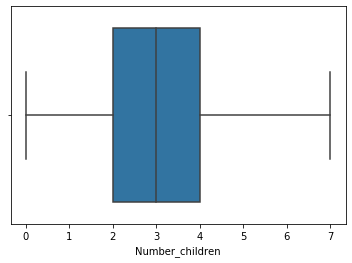

In [ ]:
m = np.mean(df.Number_children)
s = np.std(df.Number_children)
df['Z-score'] = (df.Number_children - m)/s
df_outlier = df[abs(df['Z-score']) > 2.5]
df_semOutliers = df.drop(df_outlier.index)
sns.boxplot(df_semOutliers.Number_children)


## iii) treinamento e validação dos modelos,
utilizando as melhores práticas em relação a estratégias de divisão de dados para otimização de hiperparâmetros e
seleção de modelos

 - Acurácia
 - Precision
 - Recall
 - F1 Score
 - ROC AUC score

## iv) interpretação do modelo treinado, 
buscando obter insights sobre o impacto dos atributos na tomada de decisão